# DS-NYC-45 | Unit Project 4: Notebook with Executive Summary

In this project, you will summarize and present your analysis from Unit Projects 1-3.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/ga-students/DAT-NYC-45/master/unit-project/dataset/ucla-admissions.csv?token=AH5olDHUuhpX2dh3Zar3ARAGn0N3jV0Pks5Yl807wA%3D%3D')

### Executive Summary

>In analyzing the UCLA Admissions dataset I explore each feature and run a logistic regression analysis while seeking to find any association or predictive capabilities in the prestige of an applicant's undegraduate school and whether or not they were admitted to UCLA's graduate school. After fitting the data into the regression model, I computed the coefficients into an odds ratio to easily interpret the odds chances of being admitted into graduate school based on each prestige ranking.

### Exploratory Data Analysis

In analyzing the dataset and its features, we explore their histograms and boxplots with some graphs and tables. Some potential risks the exploratory analysus addresses and remedies is the possibility of any missing data, outliers that could skew the data, or if there is any covariance between the predictor variables.

The data consists of 400 rows and 4 columns. 

Predictor Variable | Response Variable |
---|---|
gre | admit
gpa | 
prestige |

Data dictionary:

Variable | Description | Type of Variable
---|---|---
admit | Graduate school admission, 0 = not admitted, 1 = admitted | Categorical
gre | GRE exam score ranges from 0 to 800 | Continuous
gpa | GPA range from 0 to 4.0 | Continuous
prestige | Prestige from alma mater, ranges from 1 = high to 4 = low | Categorical

In [201]:
data.head()

,admit,gre,gpa,prestige,intercept
0,0,380.0,3.61,3.0,1.0
1,1,660.0,3.67,3.0,1.0
2,1,800.0,4.00,1.0,1.0
3,1,640.0,3.19,4.0,1.0
4,0,520.0,2.93,4.0,1.0


In [202]:
# This drops all NaN values from the dataset
data = data.dropna()
data.shape

(397, 5)

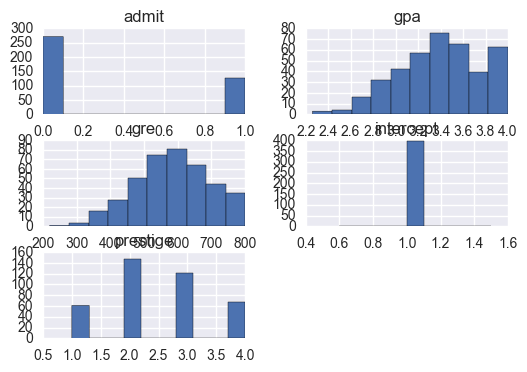

In [203]:
data.hist();

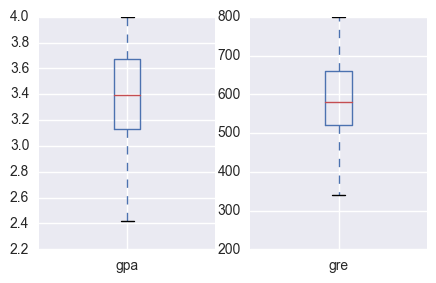

In [224]:
new_data = data[['gpa','gre']]
new_data.plot(kind='box', subplots=True, figsize=(5,3));

### Outlined methods and models

Since our predictor variable prestige is categorical we first have to create dummy variables of each prestige value before conducting a logistic regression analysis on the dataset. After we have a binary column of each value, we're able to fit and run a logistic regression analysis using the 'statsmodels' package from python, which provides a summary table of the results.

Finally, when taking the exponents of the coefficients we create the odds ratios. Thus, we can say that the odds of being admitted from a prestige 4 school decreases an applicants chance of being accepted by 21%. Or also, that the odds of being admitted from a prestige 3 school decreases an applicant's chances by 26%.

In [216]:
# Creating dummy columns from the prestige variable
data_pres = pd.get_dummies(data['prestige'],prefix='prestige',drop_first=True)
df = pd.concat([data, data_pres], axis=1)
df = df.drop('prestige', axis=1)
df['intercept'] = 1.0

In [217]:
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [218]:
# Running the logistic regression
train_cols = df.columns[1:]
logit = sm.Logit(df['admit'], df[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### Answer table:

In [219]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Jan 2017   Pseudo R-squ.:                 0.08166
Time:                        23:47:32   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
intercept       -3.8769      1.142     -3.39

#### Odds ratio table:

In [222]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
intercept       0.020716
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
dtype: float64


### Conclusion

As expected, the UCLA graduate school favors undergrad schools they deem to be more pretigious or rank one. Prestige rank four and three have lower odds of being accepted into UCLA's graduate school. In exploring this dataset for any relationship between the dependent variable prestige and the independent variable admit, we find that logistic regression is most reliable when analyzing categorical variables.